<a href="https://colab.research.google.com/github/mary-ts/Neural-Computing/blob/main/mCopy_of_CS4287_Assign2_19248547_19256434_19232845.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [23]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import keras
import keras.layers as layers
from keras import Sequential
import keras.models
from keras.layers import *
from keras.models import * 
from keras import optimizers, applications
from keras.preprocessing import image
from keras.callbacks import ModelCheckpoint, EarlyStopping

In [25]:
train_path = "/content/drive/MyDrive/CNN IMAGES/archive (1)/train/train"
test_path = "/content/drive/MyDrive/CNN IMAGES/archive (1)/test/test"

epochs = 5
batch_size = 32

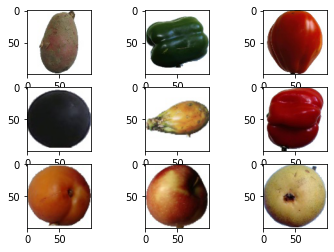

In [26]:
import os
from matplotlib import pyplot
from matplotlib.image import imread

img_dir="/content/drive/MyDrive/CNN IMAGES/archive (1)/test/test"
all_files=os.listdir(img_dir)
data_path = [os.path.join(img_dir + "/" + i) for i in all_files]
k=1
for i in data_path:
  plt.subplot(3,3,k) 
  k=k+1
  plt.imshow(imread(i))
  if k == 10:
    break

plt.show()

In [27]:
train_datagen = image.ImageDataGenerator(
    rotation_range=15,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    width_shift_range=0.1,
    height_shift_range=0.1,
    validation_split=0.2
)

test_datagen= image.ImageDataGenerator(    
    rotation_range=15,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    width_shift_range=0.1,
    height_shift_range=0.1)

In [28]:
train_generator = train_datagen.flow_from_directory(
    train_path,
    subset = 'training',
    target_size = (299,299),
    batch_size = 32,
    class_mode = 'categorical', 
    shuffle=True)

validation_generator = train_datagen.flow_from_directory(
    train_path,
    subset = 'validation',
    target_size = (299,299),
    batch_size = 32,
    shuffle=True,
    class_mode = 'categorical')

test_generator = test_datagen.flow_from_directory(
    test_path,
    target_size = (299,299),
    batch_size = 32,
    shuffle=True,
    class_mode = 'categorical')

Found 13494 images belonging to 33 classes.
Found 3361 images belonging to 33 classes.
Found 0 images belonging to 0 classes.


In [29]:
base_model = applications.Xception(weights='imagenet', 
                              include_top=False, 
                              input_shape=(299, 299, 3))

for layer in base_model.layers[:-5]:
    layer.trainable = False

model = keras.Sequential()
model.add(base_model)
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(1024, activation="relu"))
model.add(keras.layers.Dense(33, activation="softmax"))

input_shape = (None, 299, 299, 3)
model.build(input_shape)
model.compile(optimizers.RMSprop(learning_rate=0.0001, decay=1e-5),loss='categorical_crossentropy',metrics=['accuracy'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 xception (Functional)       (None, 10, 10, 2048)      20861480  
                                                                 
 flatten_2 (Flatten)         (None, 204800)            0         
                                                                 
 dense_4 (Dense)             (None, 1024)              209716224 
                                                                 
 dense_5 (Dense)             (None, 33)                33825     
                                                                 
Total params: 230,611,529
Trainable params: 212,916,769
Non-trainable params: 17,694,760
_________________________________________________________________


In [30]:
checkpoint = ModelCheckpoint("xception", monitor='val_loss', verbose=1, save_best_only=True, save_weights_only=False, mode='auto', save_freq=1)
early = EarlyStopping(monitor='val_loss', min_delta=0.0001, patience=7, verbose=2, mode='auto')
hist = model.fit(train_generator,                   
                                    validation_data=validation_generator, 
                                    steps_per_epoch=64,                   
                                    validation_steps=20,
                                    epochs=epochs,
                                    callbacks = [checkpoint, early],
                                    verbose=1)

Epoch 1/5


 1/64 [..............................] - ETA: 19:58 - loss: 3.4771 - accuracy: 0.0000e+00

 2/64 [..............................] - ETA: 10:25 - loss: 5.0586 - accuracy: 0.0312    

 3/64 [>.............................] - ETA: 12:58 - loss: 4.8784 - accuracy: 0.0417

 4/64 [>.............................] - ETA: 12:48 - loss: 4.8749 - accuracy: 0.0469

 5/64 [=>............................] - ETA: 11:58 - loss: 4.6313 - accuracy: 0.0562

 6/64 [=>............................] - ETA: 11:26 - loss: 4.3512 - accuracy: 0.0833

 7/64 [==>...........................] - ETA: 11:01 - loss: 4.2103 - accuracy: 0.1027

 8/64 [==>...........................] - ETA: 10:38 - loss: 4.1046 - accuracy: 0.1094

 9/64 [===>..........................] - ETA: 10:19 - loss: 3.9862 - accuracy: 0.1111

10/64 [===>..........................] - ETA: 10:02 - loss: 3.9018 - accuracy: 0.1156

11/64 [====>.........................] - ETA: 9:46 - loss: 3.8022 - accuracy: 0.1335 

12/64 [====>.........................] - ETA: 9:31 - loss: 3.6823 - accuracy: 0.1484

13/64 [=====>........................] - ETA: 9:17 - loss: 3.6111 - accuracy: 0.1490

14/64 [=====>........................] - ETA: 9:04 - loss: 3.5612 - accuracy: 0.1585

15/64 [======>.......................] - ETA: 8:51 - loss: 3.5023 - accuracy: 0.1625

16/64 [======>.......................] - ETA: 8:38 - loss: 3.4510 - accuracy: 0.1758

17/64 [======>.......................] - ETA: 8:26 - loss: 3.4077 - accuracy: 0.1801

18/64 [=======>......................] - ETA: 8:14 - loss: 3.3629 - accuracy: 0.1875

19/64 [=======>......................] - ETA: 8:02 - loss: 3.3571 - accuracy: 0.1908

20/64 [========>.....................] - ETA: 7:50 - loss: 3.3260 - accuracy: 0.1922

21/64 [========>.....................] - ETA: 7:38 - loss: 3.2763 - accuracy: 0.2039

22/64 [=========>....................] - ETA: 7:27 - loss: 3.2508 - accuracy: 0.2088

23/64 [=========>....................] - ETA: 7:15 - loss: 3.1996 - accuracy: 0.2160

24/64 [==========>...................] - ETA: 7:08 - loss: 3.1692 - accuracy: 0.2214

25/64 [==========>...................] - ETA: 6:56 - loss: 3.1684 - accuracy: 0.2225

26/64 [===========>..................] - ETA: 6:45 - loss: 3.1305 - accuracy: 0.2284

27/64 [===========>..................] - ETA: 6:34 - loss: 3.1004 - accuracy: 0.2326

28/64 [============>.................] - ETA: 6:23 - loss: 3.0762 - accuracy: 0.2366

29/64 [============>.................] - ETA: 6:11 - loss: 3.0215 - accuracy: 0.2511

30/64 [=============>................] - ETA: 6:00 - loss: 2.9768 - accuracy: 0.2583

31/64 [=============>................] - ETA: 5:49 - loss: 2.9554 - accuracy: 0.2651

32/64 [==============>...............] - ETA: 5:38 - loss: 2.9209 - accuracy: 0.2695

33/64 [==============>...............] - ETA: 5:29 - loss: 2.9166 - accuracy: 0.2689

34/64 [==============>...............] - ETA: 5:18 - loss: 2.8994 - accuracy: 0.2748

35/64 [===============>..............] - ETA: 5:07 - loss: 2.8664 - accuracy: 0.2812

36/64 [===============>..............] - ETA: 4:56 - loss: 2.8494 - accuracy: 0.2804

37/64 [================>.............] - ETA: 4:45 - loss: 2.8350 - accuracy: 0.2812

38/64 [================>.............] - ETA: 4:34 - loss: 2.8119 - accuracy: 0.2845

39/64 [=================>............] - ETA: 4:23 - loss: 2.7865 - accuracy: 0.2877

40/64 [=================>............] - ETA: 4:13 - loss: 2.7546 - accuracy: 0.2945

41/64 [==================>...........] - ETA: 4:02 - loss: 2.7406 - accuracy: 0.2957

42/64 [==================>...........] - ETA: 3:51 - loss: 2.7213 - accuracy: 0.2969

43/64 [===================>..........] - ETA: 3:40 - loss: 2.7088 - accuracy: 0.2965

44/64 [===================>..........] - ETA: 3:30 - loss: 2.6846 - accuracy: 0.3026

45/64 [====================>.........] - ETA: 3:20 - loss: 2.6655 - accuracy: 0.3069

46/64 [====================>.........] - ETA: 3:09 - loss: 2.6484 - accuracy: 0.3111

47/64 [=====================>........] - ETA: 2:59 - loss: 2.6388 - accuracy: 0.3132

48/64 [=====================>........] - ETA: 2:48 - loss: 2.6200 - accuracy: 0.3177

49/64 [=====================>........] - ETA: 2:38 - loss: 2.6016 - accuracy: 0.3214

50/64 [======================>.......] - ETA: 2:27 - loss: 2.5819 - accuracy: 0.3256

51/64 [======================>.......] - ETA: 2:16 - loss: 2.5675 - accuracy: 0.3284

52/64 [=======================>......] - ETA: 2:06 - loss: 2.5521 - accuracy: 0.3323

53/64 [=======================>......] - ETA: 1:55 - loss: 2.5376 - accuracy: 0.3337

54/64 [========================>.....] - ETA: 1:45 - loss: 2.5225 - accuracy: 0.3368

55/64 [========================>.....] - ETA: 1:34 - loss: 2.5101 - accuracy: 0.3398

56/64 [=========================>....] - ETA: 1:23 - loss: 2.4948 - accuracy: 0.3432

57/64 [=========================>....] - ETA: 1:13 - loss: 2.4738 - accuracy: 0.3470

58/64 [==========================>...] - ETA: 1:02 - loss: 2.4596 - accuracy: 0.3508

59/64 [==========================>...] - ETA: 52s - loss: 2.4425 - accuracy: 0.3565 

60/64 [===========================>..] - ETA: 41s - loss: 2.4278 - accuracy: 0.3583

61/64 [===========================>..] - ETA: 31s - loss: 2.4122 - accuracy: 0.3622

62/64 [============================>.] - ETA: 21s - loss: 2.3986 - accuracy: 0.3644

63/64 [============================>.] - ETA: 10s - loss: 2.3978 - accuracy: 0.3666

64/64 [==============================] - 842s 13s/step - loss: 2.3895 - accuracy: 0.3677 - val_loss: 4.3714 - val_accuracy: 0.2844
Epoch 2/5


 1/64 [..............................] - ETA: 15:56 - loss: 1.5902 - accuracy: 0.5938

 2/64 [..............................] - ETA: 10:33 - loss: 1.5949 - accuracy: 0.5312

 3/64 [>.............................] - ETA: 11:42 - loss: 1.6310 - accuracy: 0.5104

 4/64 [>.............................] - ETA: 11:03 - loss: 1.5409 - accuracy: 0.5391

 5/64 [=>............................] - ETA: 10:40 - loss: 1.5834 - accuracy: 0.5250

 6/64 [=>............................] - ETA: 10:20 - loss: 1.6556 - accuracy: 0.5000

 7/64 [==>...........................] - ETA: 10:05 - loss: 1.5740 - accuracy: 0.5312

 8/64 [==>...........................] - ETA: 9:50 - loss: 1.5302 - accuracy: 0.5469 

 9/64 [===>..........................] - ETA: 9:38 - loss: 1.5154 - accuracy: 0.5417

10/64 [===>..........................] - ETA: 9:24 - loss: 1.5047 - accuracy: 0.5656

11/64 [====>.........................] - ETA: 9:13 - loss: 1.4793 - accuracy: 0.5767

12/64 [====>.........................] - ETA: 9:01 - loss: 1.4505 - accuracy: 0.5807

13/64 [=====>........................] - ETA: 8:50 - loss: 1.4073 - accuracy: 0.5938

14/64 [=====>........................] - ETA: 8:39 - loss: 1.3992 - accuracy: 0.6049

15/64 [======>.......................] - ETA: 8:28 - loss: 1.3750 - accuracy: 0.6083

16/64 [======>.......................] - ETA: 8:17 - loss: 1.3541 - accuracy: 0.6113

17/64 [======>.......................] - ETA: 8:06 - loss: 1.3499 - accuracy: 0.6158

18/64 [=======>......................] - ETA: 7:55 - loss: 1.3379 - accuracy: 0.6146

19/64 [=======>......................] - ETA: 7:44 - loss: 1.3346 - accuracy: 0.6135

20/64 [========>.....................] - ETA: 7:39 - loss: 1.3188 - accuracy: 0.6203

21/64 [========>.....................] - ETA: 7:28 - loss: 1.3537 - accuracy: 0.6086

22/64 [=========>....................] - ETA: 7:17 - loss: 1.3609 - accuracy: 0.6065

23/64 [=========>....................] - ETA: 7:06 - loss: 1.3592 - accuracy: 0.6033

24/64 [==========>...................] - ETA: 6:59 - loss: 1.3576 - accuracy: 0.5990

25/64 [==========>...................] - ETA: 6:48 - loss: 1.3440 - accuracy: 0.6087

26/64 [===========>..................] - ETA: 6:37 - loss: 1.3341 - accuracy: 0.6142

27/64 [===========>..................] - ETA: 6:26 - loss: 1.3299 - accuracy: 0.6181

28/64 [============>.................] - ETA: 6:15 - loss: 1.3391 - accuracy: 0.6150

29/64 [============>.................] - ETA: 6:04 - loss: 1.3350 - accuracy: 0.6185

30/64 [=============>................] - ETA: 5:54 - loss: 1.3289 - accuracy: 0.6208

31/64 [=============>................] - ETA: 5:43 - loss: 1.3150 - accuracy: 0.6230

32/64 [==============>...............] - ETA: 5:32 - loss: 1.3178 - accuracy: 0.6230

33/64 [==============>...............] - ETA: 5:22 - loss: 1.3051 - accuracy: 0.6250

34/64 [==============>...............] - ETA: 5:11 - loss: 1.3373 - accuracy: 0.6195

35/64 [===============>..............] - ETA: 5:00 - loss: 1.3326 - accuracy: 0.6223

36/64 [===============>..............] - ETA: 4:50 - loss: 1.3262 - accuracy: 0.6233

37/64 [================>.............] - ETA: 4:42 - loss: 1.3184 - accuracy: 0.6250

38/64 [================>.............] - ETA: 4:33 - loss: 1.3040 - accuracy: 0.6308

39/64 [=================>............] - ETA: 4:22 - loss: 1.2902 - accuracy: 0.6354

40/64 [=================>............] - ETA: 4:11 - loss: 1.2787 - accuracy: 0.6383

41/64 [==================>...........] - ETA: 4:01 - loss: 1.2682 - accuracy: 0.6410

42/64 [==================>...........] - ETA: 3:50 - loss: 1.2518 - accuracy: 0.6458

43/64 [===================>..........] - ETA: 3:40 - loss: 1.2449 - accuracy: 0.6483

44/64 [===================>..........] - ETA: 3:30 - loss: 1.2328 - accuracy: 0.6513

45/64 [====================>.........] - ETA: 3:19 - loss: 1.2265 - accuracy: 0.6521

46/64 [====================>.........] - ETA: 3:09 - loss: 1.2215 - accuracy: 0.6515

47/64 [=====================>........] - ETA: 2:58 - loss: 1.2250 - accuracy: 0.6509

48/64 [=====================>........] - ETA: 2:48 - loss: 1.2187 - accuracy: 0.6523

49/64 [=====================>........] - ETA: 2:37 - loss: 1.2110 - accuracy: 0.6556

50/64 [======================>.......] - ETA: 2:26 - loss: 1.2044 - accuracy: 0.6550

51/64 [======================>.......] - ETA: 2:16 - loss: 1.1987 - accuracy: 0.6562

52/64 [=======================>......] - ETA: 2:05 - loss: 1.1934 - accuracy: 0.6575

53/64 [=======================>......] - ETA: 1:55 - loss: 1.1946 - accuracy: 0.6568

54/64 [========================>.....] - ETA: 1:44 - loss: 1.1884 - accuracy: 0.6586

55/64 [========================>.....] - ETA: 1:34 - loss: 1.1853 - accuracy: 0.6574

56/64 [=========================>....] - ETA: 1:23 - loss: 1.1784 - accuracy: 0.6579

57/64 [=========================>....] - ETA: 1:13 - loss: 1.1719 - accuracy: 0.6595

58/64 [==========================>...] - ETA: 1:02 - loss: 1.1645 - accuracy: 0.6611

59/64 [==========================>...] - ETA: 52s - loss: 1.1560 - accuracy: 0.6631 

60/64 [===========================>..] - ETA: 41s - loss: 1.1600 - accuracy: 0.6625

61/64 [===========================>..] - ETA: 31s - loss: 1.1570 - accuracy: 0.6634

62/64 [============================>.] - ETA: 20s - loss: 1.1540 - accuracy: 0.6628

63/64 [============================>.] - ETA: 10s - loss: 1.1528 - accuracy: 0.6637

64/64 [==============================] - 832s 13s/step - loss: 1.1467 - accuracy: 0.6650 - val_loss: 1.2187 - val_accuracy: 0.6234
Epoch 3/5


 1/64 [..............................] - ETA: 14:00 - loss: 1.0216 - accuracy: 0.7188

 2/64 [..............................] - ETA: 12:34 - loss: 0.8039 - accuracy: 0.7344

 3/64 [>.............................] - ETA: 11:24 - loss: 0.9566 - accuracy: 0.7083

 4/64 [>.............................] - ETA: 10:54 - loss: 0.8990 - accuracy: 0.7266

 5/64 [=>............................] - ETA: 10:34 - loss: 0.8807 - accuracy: 0.7437

 6/64 [=>............................] - ETA: 10:17 - loss: 0.8347 - accuracy: 0.7656

 7/64 [==>...........................] - ETA: 10:10 - loss: 0.8535 - accuracy: 0.7589

 8/64 [==>...........................] - ETA: 9:56 - loss: 0.8443 - accuracy: 0.7500 

 9/64 [===>..........................] - ETA: 9:43 - loss: 0.8569 - accuracy: 0.7396

10/64 [===>..........................] - ETA: 9:30 - loss: 0.9259 - accuracy: 0.7219

11/64 [====>.........................] - ETA: 9:18 - loss: 0.8944 - accuracy: 0.7244

12/64 [====>.........................] - ETA: 9:06 - loss: 0.8952 - accuracy: 0.7214

13/64 [=====>........................] - ETA: 9:17 - loss: 0.8784 - accuracy: 0.7308

14/64 [=====>........................] - ETA: 9:07 - loss: 0.8802 - accuracy: 0.7232

15/64 [======>.......................] - ETA: 8:53 - loss: 0.8515 - accuracy: 0.7354

16/64 [======>.......................] - ETA: 8:41 - loss: 0.8251 - accuracy: 0.7461

17/64 [======>.......................] - ETA: 8:28 - loss: 0.8227 - accuracy: 0.7426

18/64 [=======>......................] - ETA: 8:16 - loss: 0.8126 - accuracy: 0.7413

19/64 [=======>......................] - ETA: 8:04 - loss: 0.8154 - accuracy: 0.7418

20/64 [========>.....................] - ETA: 7:52 - loss: 0.8141 - accuracy: 0.7453

21/64 [========>.....................] - ETA: 7:40 - loss: 0.8002 - accuracy: 0.7485

22/64 [=========>....................] - ETA: 7:30 - loss: 0.7998 - accuracy: 0.7486

23/64 [=========>....................] - ETA: 7:21 - loss: 0.8007 - accuracy: 0.7473

24/64 [==========>...................] - ETA: 7:09 - loss: 0.8080 - accuracy: 0.7474

25/64 [==========>...................] - ETA: 6:58 - loss: 0.8003 - accuracy: 0.7513

26/64 [===========>..................] - ETA: 6:46 - loss: 0.7921 - accuracy: 0.7524

27/64 [===========>..................] - ETA: 6:35 - loss: 0.7806 - accuracy: 0.7523

28/64 [============>.................] - ETA: 6:24 - loss: 0.7732 - accuracy: 0.7545

29/64 [============>.................] - ETA: 6:13 - loss: 0.7722 - accuracy: 0.7575

30/64 [=============>................] - ETA: 6:02 - loss: 0.7767 - accuracy: 0.7594

31/64 [=============>................] - ETA: 5:50 - loss: 0.7753 - accuracy: 0.7601

32/64 [==============>...............] - ETA: 5:39 - loss: 0.7763 - accuracy: 0.7607

33/64 [==============>...............] - ETA: 5:28 - loss: 0.7661 - accuracy: 0.7661

34/64 [==============>...............] - ETA: 5:18 - loss: 0.7653 - accuracy: 0.7656

35/64 [===============>..............] - ETA: 5:07 - loss: 0.7638 - accuracy: 0.7670

36/64 [===============>..............] - ETA: 4:56 - loss: 0.7671 - accuracy: 0.7665

37/64 [================>.............] - ETA: 4:45 - loss: 0.7691 - accuracy: 0.7635

38/64 [================>.............] - ETA: 4:34 - loss: 0.7631 - accuracy: 0.7623

39/64 [=================>............] - ETA: 4:23 - loss: 0.7588 - accuracy: 0.7636

40/64 [=================>............] - ETA: 4:12 - loss: 0.7573 - accuracy: 0.7633

41/64 [==================>...........] - ETA: 4:02 - loss: 0.7566 - accuracy: 0.7630

42/64 [==================>...........] - ETA: 3:51 - loss: 0.7603 - accuracy: 0.7619

43/64 [===================>..........] - ETA: 3:41 - loss: 0.7546 - accuracy: 0.7631

44/64 [===================>..........] - ETA: 3:31 - loss: 0.7530 - accuracy: 0.7614

45/64 [====================>.........] - ETA: 3:20 - loss: 0.7485 - accuracy: 0.7632

46/64 [====================>.........] - ETA: 3:09 - loss: 0.7444 - accuracy: 0.7636

47/64 [=====================>........] - ETA: 2:59 - loss: 0.7388 - accuracy: 0.7653

48/64 [=====================>........] - ETA: 2:48 - loss: 0.7367 - accuracy: 0.7663

49/64 [=====================>........] - ETA: 2:37 - loss: 0.7292 - accuracy: 0.7679

50/64 [======================>.......] - ETA: 2:27 - loss: 0.7264 - accuracy: 0.7700

51/64 [======================>.......] - ETA: 2:16 - loss: 0.7193 - accuracy: 0.7727

52/64 [=======================>......] - ETA: 2:06 - loss: 0.7262 - accuracy: 0.7722

53/64 [=======================>......] - ETA: 1:55 - loss: 0.7222 - accuracy: 0.7718

54/64 [========================>.....] - ETA: 1:45 - loss: 0.7204 - accuracy: 0.7714

55/64 [========================>.....] - ETA: 1:34 - loss: 0.7239 - accuracy: 0.7693

56/64 [=========================>....] - ETA: 1:23 - loss: 0.7232 - accuracy: 0.7695

57/64 [=========================>....] - ETA: 1:13 - loss: 0.7171 - accuracy: 0.7719

58/64 [==========================>...] - ETA: 1:02 - loss: 0.7091 - accuracy: 0.7748

59/64 [==========================>...] - ETA: 52s - loss: 0.7034 - accuracy: 0.7765 

60/64 [===========================>..] - ETA: 41s - loss: 0.7081 - accuracy: 0.7771

61/64 [===========================>..] - ETA: 31s - loss: 0.7065 - accuracy: 0.7777

62/64 [============================>.] - ETA: 20s - loss: 0.7098 - accuracy: 0.7777

63/64 [============================>.] - ETA: 10s - loss: 0.7087 - accuracy: 0.7773

64/64 [==============================] - 833s 13s/step - loss: 0.7100 - accuracy: 0.7783 - val_loss: 0.8182 - val_accuracy: 0.7422
Epoch 4/5


 1/64 [..............................] - ETA: 14:43 - loss: 0.8431 - accuracy: 0.7188

 2/64 [..............................] - ETA: 11:07 - loss: 0.8070 - accuracy: 0.7500

 3/64 [>.............................] - ETA: 10:43 - loss: 0.6999 - accuracy: 0.7812

 4/64 [>.............................] - ETA: 11:03 - loss: 0.7277 - accuracy: 0.7578

 5/64 [=>............................] - ETA: 10:40 - loss: 0.7064 - accuracy: 0.7688

 6/64 [=>............................] - ETA: 10:22 - loss: 0.6414 - accuracy: 0.7865

 7/64 [==>...........................] - ETA: 10:07 - loss: 0.6112 - accuracy: 0.7946

 8/64 [==>...........................] - ETA: 9:53 - loss: 0.5720 - accuracy: 0.8086 

 9/64 [===>..........................] - ETA: 9:40 - loss: 0.5822 - accuracy: 0.8021

10/64 [===>..........................] - ETA: 9:28 - loss: 0.5659 - accuracy: 0.8156

11/64 [====>.........................] - ETA: 9:17 - loss: 0.5469 - accuracy: 0.8210

12/64 [====>.........................] - ETA: 9:05 - loss: 0.5347 - accuracy: 0.8177

13/64 [=====>........................] - ETA: 8:54 - loss: 0.5322 - accuracy: 0.8173

14/64 [=====>........................] - ETA: 8:43 - loss: 0.5144 - accuracy: 0.8237

15/64 [======>.......................] - ETA: 8:31 - loss: 0.5039 - accuracy: 0.8271

16/64 [======>.......................] - ETA: 8:20 - loss: 0.5089 - accuracy: 0.8203

17/64 [======>.......................] - ETA: 8:09 - loss: 0.5125 - accuracy: 0.8235

18/64 [=======>......................] - ETA: 7:58 - loss: 0.5059 - accuracy: 0.8264

19/64 [=======>......................] - ETA: 7:48 - loss: 0.4940 - accuracy: 0.8273

20/64 [========>.....................] - ETA: 7:37 - loss: 0.4956 - accuracy: 0.8234

21/64 [========>.....................] - ETA: 7:26 - loss: 0.4926 - accuracy: 0.8244

22/64 [=========>....................] - ETA: 7:15 - loss: 0.4848 - accuracy: 0.8281

23/64 [=========>....................] - ETA: 7:05 - loss: 0.4889 - accuracy: 0.8288

24/64 [==========>...................] - ETA: 6:56 - loss: 0.4901 - accuracy: 0.8320

25/64 [==========>...................] - ETA: 6:47 - loss: 0.5050 - accuracy: 0.8263

26/64 [===========>..................] - ETA: 6:36 - loss: 0.5675 - accuracy: 0.8125

27/64 [===========>..................] - ETA: 6:25 - loss: 0.5682 - accuracy: 0.8137

28/64 [============>.................] - ETA: 6:14 - loss: 0.5611 - accuracy: 0.8170

29/64 [============>.................] - ETA: 6:04 - loss: 0.5538 - accuracy: 0.8190

30/64 [=============>................] - ETA: 5:53 - loss: 0.5543 - accuracy: 0.8198

31/64 [=============>................] - ETA: 5:42 - loss: 0.5551 - accuracy: 0.8216

32/64 [==============>...............] - ETA: 5:32 - loss: 0.5570 - accuracy: 0.8213

33/64 [==============>...............] - ETA: 5:21 - loss: 0.5630 - accuracy: 0.8210

34/64 [==============>...............] - ETA: 5:11 - loss: 0.5599 - accuracy: 0.8208

35/64 [===============>..............] - ETA: 5:00 - loss: 0.5514 - accuracy: 0.8241

36/64 [===============>..............] - ETA: 4:50 - loss: 0.5484 - accuracy: 0.8255

37/64 [================>.............] - ETA: 4:39 - loss: 0.5446 - accuracy: 0.8277

38/64 [================>.............] - ETA: 4:29 - loss: 0.5458 - accuracy: 0.8273

39/64 [=================>............] - ETA: 4:18 - loss: 0.5453 - accuracy: 0.8285

40/64 [=================>............] - ETA: 4:08 - loss: 0.5497 - accuracy: 0.8289

41/64 [==================>...........] - ETA: 3:58 - loss: 0.5510 - accuracy: 0.8285

42/64 [==================>...........] - ETA: 3:47 - loss: 0.5540 - accuracy: 0.8281

43/64 [===================>..........] - ETA: 3:35 - loss: 0.5569 - accuracy: 0.8280

44/64 [===================>..........] - ETA: 3:25 - loss: 0.5507 - accuracy: 0.8298

45/64 [====================>.........] - ETA: 3:16 - loss: 0.5501 - accuracy: 0.8301

46/64 [====================>.........] - ETA: 3:05 - loss: 0.5440 - accuracy: 0.8317

47/64 [=====================>........] - ETA: 2:55 - loss: 0.5402 - accuracy: 0.8333

48/64 [=====================>........] - ETA: 2:44 - loss: 0.5363 - accuracy: 0.8336

49/64 [=====================>........] - ETA: 2:34 - loss: 0.5408 - accuracy: 0.8312

50/64 [======================>.......] - ETA: 2:24 - loss: 0.5415 - accuracy: 0.8327

51/64 [======================>.......] - ETA: 2:15 - loss: 0.5387 - accuracy: 0.8348

52/64 [=======================>......] - ETA: 2:04 - loss: 0.5391 - accuracy: 0.8356

53/64 [=======================>......] - ETA: 1:54 - loss: 0.5382 - accuracy: 0.8357

54/64 [========================>.....] - ETA: 1:43 - loss: 0.5342 - accuracy: 0.8370

55/64 [========================>.....] - ETA: 1:33 - loss: 0.5289 - accuracy: 0.8383

56/64 [=========================>....] - ETA: 1:23 - loss: 0.5260 - accuracy: 0.8389

57/64 [=========================>....] - ETA: 1:12 - loss: 0.5293 - accuracy: 0.8379

58/64 [==========================>...] - ETA: 1:02 - loss: 0.5257 - accuracy: 0.8391

59/64 [==========================>...] - ETA: 51s - loss: 0.5218 - accuracy: 0.8408 

60/64 [===========================>..] - ETA: 41s - loss: 0.5181 - accuracy: 0.8419

61/64 [===========================>..] - ETA: 31s - loss: 0.5157 - accuracy: 0.8424

62/64 [============================>.] - ETA: 20s - loss: 0.5112 - accuracy: 0.8435

63/64 [============================>.] - ETA: 10s - loss: 0.5092 - accuracy: 0.8440

64/64 [==============================] - 823s 13s/step - loss: 0.5055 - accuracy: 0.8449 - val_loss: 0.3233 - val_accuracy: 0.8859
Epoch 5/5


 1/64 [..............................] - ETA: 14:20 - loss: 0.6112 - accuracy: 0.8438

 2/64 [..............................] - ETA: 10:29 - loss: 0.4754 - accuracy: 0.8906

 3/64 [>.............................] - ETA: 10:59 - loss: 0.3732 - accuracy: 0.9062

 4/64 [>.............................] - ETA: 10:56 - loss: 0.4090 - accuracy: 0.8828

 5/64 [=>............................] - ETA: 10:35 - loss: 0.3811 - accuracy: 0.8750

 6/64 [=>............................] - ETA: 10:58 - loss: 0.3793 - accuracy: 0.8646

 7/64 [==>...........................] - ETA: 10:37 - loss: 0.4020 - accuracy: 0.8571

 8/64 [==>...........................] - ETA: 10:18 - loss: 0.4124 - accuracy: 0.8594

 9/64 [===>..........................] - ETA: 10:02 - loss: 0.3939 - accuracy: 0.8646

10/64 [===>..........................] - ETA: 9:47 - loss: 0.3960 - accuracy: 0.8656 

11/64 [====>.........................] - ETA: 9:33 - loss: 0.4043 - accuracy: 0.8636

12/64 [====>.........................] - ETA: 9:19 - loss: 0.4065 - accuracy: 0.8646

13/64 [=====>........................] - ETA: 9:07 - loss: 0.3978 - accuracy: 0.8654

14/64 [=====>........................] - ETA: 8:54 - loss: 0.4041 - accuracy: 0.8616

15/64 [======>.......................] - ETA: 8:42 - loss: 0.4010 - accuracy: 0.8625

16/64 [======>.......................] - ETA: 8:30 - loss: 0.3912 - accuracy: 0.8672

17/64 [======>.......................] - ETA: 8:19 - loss: 0.3946 - accuracy: 0.8640

18/64 [=======>......................] - ETA: 8:07 - loss: 0.3993 - accuracy: 0.8628

19/64 [=======>......................] - ETA: 7:55 - loss: 0.4066 - accuracy: 0.8569

20/64 [========>.....................] - ETA: 7:44 - loss: 0.4085 - accuracy: 0.8562

21/64 [========>.....................] - ETA: 7:33 - loss: 0.4072 - accuracy: 0.8586

22/64 [=========>....................] - ETA: 7:22 - loss: 0.3985 - accuracy: 0.8622

23/64 [=========>....................] - ETA: 7:11 - loss: 0.3961 - accuracy: 0.8628

24/64 [==========>...................] - ETA: 7:03 - loss: 0.3948 - accuracy: 0.8633

25/64 [==========>...................] - ETA: 6:52 - loss: 0.3964 - accuracy: 0.8637

26/64 [===========>..................] - ETA: 6:47 - loss: 0.4083 - accuracy: 0.8606

27/64 [===========>..................] - ETA: 6:36 - loss: 0.4151 - accuracy: 0.8588

28/64 [============>.................] - ETA: 6:25 - loss: 0.4118 - accuracy: 0.8616

29/64 [============>.................] - ETA: 6:14 - loss: 0.4119 - accuracy: 0.8631

30/64 [=============>................] - ETA: 6:02 - loss: 0.4173 - accuracy: 0.8594

31/64 [=============>................] - ETA: 5:52 - loss: 0.4178 - accuracy: 0.8589

32/64 [==============>...............] - ETA: 5:41 - loss: 0.4140 - accuracy: 0.8604

33/64 [==============>...............] - ETA: 5:30 - loss: 0.4096 - accuracy: 0.8627

34/64 [==============>...............] - ETA: 5:19 - loss: 0.4122 - accuracy: 0.8621

35/64 [===============>..............] - ETA: 5:08 - loss: 0.4105 - accuracy: 0.8616

36/64 [===============>..............] - ETA: 4:57 - loss: 0.4061 - accuracy: 0.8620

37/64 [================>.............] - ETA: 4:46 - loss: 0.4059 - accuracy: 0.8623

38/64 [================>.............] - ETA: 4:35 - loss: 0.4013 - accuracy: 0.8651

39/64 [=================>............] - ETA: 4:24 - loss: 0.4017 - accuracy: 0.8646

40/64 [=================>............] - ETA: 4:14 - loss: 0.4004 - accuracy: 0.8648

41/64 [==================>...........] - ETA: 4:03 - loss: 0.4080 - accuracy: 0.8620

42/64 [==================>...........] - ETA: 3:52 - loss: 0.4083 - accuracy: 0.8624

43/64 [===================>..........] - ETA: 3:41 - loss: 0.4028 - accuracy: 0.8641

44/64 [===================>..........] - ETA: 3:32 - loss: 0.4002 - accuracy: 0.8643

45/64 [====================>.........] - ETA: 3:21 - loss: 0.3972 - accuracy: 0.8653

46/64 [====================>.........] - ETA: 3:10 - loss: 0.3963 - accuracy: 0.8655

47/64 [=====================>........] - ETA: 2:59 - loss: 0.3967 - accuracy: 0.8670

48/64 [=====================>........] - ETA: 2:49 - loss: 0.3942 - accuracy: 0.8672

49/64 [=====================>........] - ETA: 2:38 - loss: 0.3915 - accuracy: 0.8693

50/64 [======================>.......] - ETA: 2:27 - loss: 0.3883 - accuracy: 0.8712

51/64 [======================>.......] - ETA: 2:17 - loss: 0.3854 - accuracy: 0.8713

52/64 [=======================>......] - ETA: 2:06 - loss: 0.3869 - accuracy: 0.8702

53/64 [=======================>......] - ETA: 1:56 - loss: 0.3881 - accuracy: 0.8703

54/64 [========================>.....] - ETA: 1:45 - loss: 0.3922 - accuracy: 0.8698

55/64 [========================>.....] - ETA: 1:34 - loss: 0.3895 - accuracy: 0.8710

56/64 [=========================>....] - ETA: 1:24 - loss: 0.3901 - accuracy: 0.8705

57/64 [=========================>....] - ETA: 1:13 - loss: 0.3855 - accuracy: 0.8717

58/64 [==========================>...] - ETA: 1:03 - loss: 0.3845 - accuracy: 0.8718

59/64 [==========================>...] - ETA: 52s - loss: 0.3827 - accuracy: 0.8729 

60/64 [===========================>..] - ETA: 42s - loss: 0.3813 - accuracy: 0.8734

61/64 [===========================>..] - ETA: 31s - loss: 0.3794 - accuracy: 0.8735

62/64 [============================>.] - ETA: 21s - loss: 0.3816 - accuracy: 0.8720

63/64 [============================>.] - ETA: 10s - loss: 0.3788 - accuracy: 0.8725

64/64 [==============================] - 832s 13s/step - loss: 0.3819 - accuracy: 0.8716 - val_loss: 0.2705 - val_accuracy: 0.9156


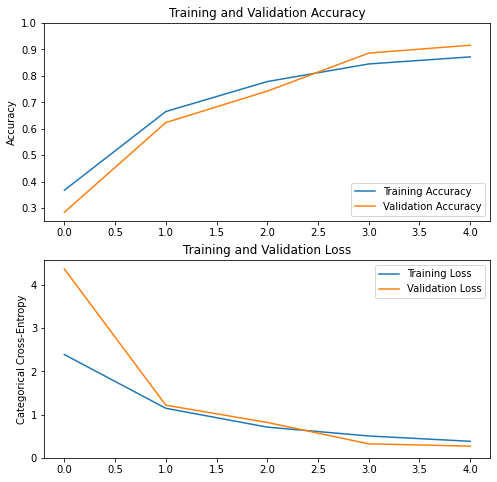

In [31]:
import matplotlib.pyplot as plt

acc = hist.history['accuracy']
val_acc = hist.history['val_accuracy']

loss = hist.history['loss']
val_loss = hist.history['val_loss']

# Accuracy Graph

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

# Loss Graph

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Categorical Cross-Entropy')
plt.ylim([0,max(plt.ylim())])
plt.title('Training and Validation Loss')
plt.show()

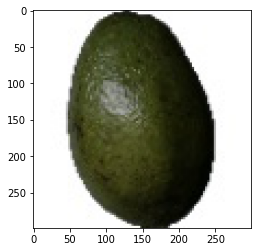

In [32]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
#from tensorflow.explain.core.activations import ExtractActivations
from tensorflow.keras.applications.xception import decode_predictions
%matplotlib inline
import requests
from matplotlib.image import imread

#loading and preprocessing fruits
IMAGE_PATH='/content/drive/MyDrive/CNN IMAGES/archive (1)/test/test/0013.jpg'
imread=tf.keras.preprocessing.image.load_img(IMAGE_PATH,target_size=(299,299))
imread=tf.keras.preprocessing.image.img_to_array(imread)

#view the image
plt.imshow(imread/255.)

In [33]:
#fetching labels from Imagenet  
response=requests.get('/content/drive/MyDrive/CNN IMAGES/archive (1)/sampleSubmission.csv')
imgnet_map=response.json()
imgnet_map={v[1]:k for k, v in imgnet_map.items()}

#make model predictions
imread=tf.keras.applications.xception.preprocess_input(imread)
predictions=model.predict(np.array([imread]))
decode_predictions(predictions,top=5)

MissingSchema: ignored